In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

plt.rc('figure',figsize=(18,9))
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'plotly'

In [7]:
import os
import pandas as pd

# Get the path to the directory containing this script
script_dir = os.getcwd()

# Get the parent directory of the script directory
parent_dir = os.path.dirname(script_dir)

# Get the parent directory of the parent directory
grandparent_dir = os.path.dirname(parent_dir)

# Define the path to the file relative to the current working directory
file_path = os.path.join(grandparent_dir, 'data', 'raw_data', 'churn.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to verify that it was loaded correctly


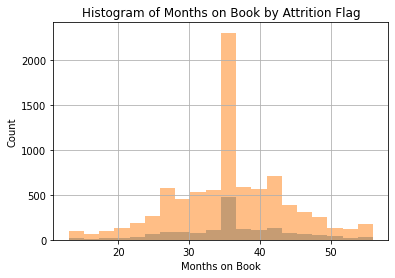

In [14]:
import matplotlib.pyplot as plt
# Group the data by the 'Attrition_Flag' column and plot a histogram of 'Months_on_book' for each group
df.groupby('Attrition_Flag')['Months_on_book'].hist(alpha=0.5, bins=20)

# Set the plot title and axis labels
plt.title('Histogram of Months on Book by Attrition Flag')
plt.xlabel('Months on Book')
plt.ylabel('Count')

# Show the plot
plt.show()

customer ages in our dataset follows a fairly normal distribution; thus, further use of the age feature can be done with the normality assumption.

In [ ]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=c_data['Customer_Age'],name='Age Box Plot',boxmean=True)
tr2=go.Histogram(x=c_data['Customer_Age'],name='Age Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Ages")
fig.show()

 we can say that genders are uniformly distributed.

In [ ]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Platinum Card Holders','<b>Blue Card Holders<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"}] ,
           [None                               ,{"type": "pie"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=c_data.Gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>'],hole=0.3,pull=[0,0.3]),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=['Female Platinum Card Holders','Male Platinum Card Holders'],
        values=c_data.query('Card_Category=="Platinum"').Gender.value_counts().values,
        pull=[0,0.05,0.5],
        hole=0.3
        
    ),
    row=1, col=2
)

fig.add_trace(
    go.Pie(
        labels=['Female Blue Card Holders','Male Blue Card Holders'],
        values=c_data.query('Card_Category=="Blue"').Gender.value_counts().values,
        pull=[0,0.2,0.5],
        hole=0.3
    ),
    row=2, col=2
)



fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Distribution Of Gender And Different Card Statuses<b>",
)

fig.show()  

In [ ]:
# Defining plot design
def plot_design():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

EDA categorical variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Select categorical variables
categ = df.select_dtypes(include=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(20, 20))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Hiragino Kaku Gothic Pro'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("crest_r", n_colors=7).as_hex()

# Loop columns
for i in (enumerate(categ)):
    plt.subplot(4, 2, i[0]+1)
    
    if df[i[1]].value_counts().count() > 2:
        ax = sns.countplot(y = i[1], data = df, order=df[i[1]].value_counts().index, palette=colors)
        pct = df[i[1]].value_counts(ascending=False, normalize=True).values * 100
        ax.bar_label(container=ax.containers[0], labels=list(map('{:.2f}%'.format,pct)), padding=3, size=12, color='black')
        ax.grid(False)
        ax.grid(b=None)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.set_xticklabels('')
        plot_design()

    else:
        _, texts, pcts = plt.pie(
            df[i[1]].value_counts(), 
            labels=df[i[1]].value_counts().index, 
            colors= ['#00538F', '#6AADCC'],
            autopct='%1.1f%%', 
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            startangle=50)
        for pcts in pcts:
          pcts.set_color('white')
        plt.title(i[1], fontsize=20, color='black')

Numerical variables

In [ ]:
# Select numerical variables
numeric = df.select_dtypes(exclude=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(20, 35))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Hiragino Kaku Gothic Pro'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("dark", n_colors=14).as_hex()

# Loop columns
for i in (enumerate(numeric)):
    plt.subplot(7, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = df, color=colors[i[0]], fill=True)
    plt.grid(b=None)
    plot_design()

Preprocessing: skew variables

In [ ]:
skew_limit = 0.5
skew_vals = df[numeric].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

In [ ]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Normalize skewed features
for col in skew_cols.index:
    df[col] = boxcox1p(df[col], boxcox_normmax(df[col] + 1))

scaling features

In [ ]:
# Scaling features
from sklearn.preprocessing import MinMaxScaler

for col in df[numeric]:
    df[col] = MinMaxScaler().fit_transform(df[[col]])

encoding categorical features

In [ ]:
# One hot encoding
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Select categorical variables
categ = df.select_dtypes(include=object).columns

# Encoding with get dummies
df = pd.get_dummies(df, columns=categ)

# Drop columns to avoid multicollinearity
df= df[df.columns.drop(list(df.filter(regex='Unknown')))]
df= df[df.columns.drop(list(df.filter(regex='Platinum')))]

df.head()

Data Upsampling Using SMOTE Algorithm


In [ ]:
# Split target & features
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [ ]:
# Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE

# Upsampling with SMOTE algorithm
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_smote.shape}''')

print('\nBalance of positive and negative classes (%):')
y_smote.value_counts(normalize=True) * 100

Dimensionality Reduction


In [ ]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick

pca = PCA()
pca.fit(X_smote)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]

# Visualize
fig, ax = plt.subplots(figsize =(10, 10))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

ax.plot(d,cumsum, color = '#00538F', label='Cumulative Explained Variance')

ax.axhline(y = 95, color='black', linestyle=':', label = '95% Explained Variance')
ax.legend(loc='best')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

# Set percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# annotation arrow
arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate('Principal Component Number 19', 
             xy=(19, 95), 
             xytext=(19+5, 95+10), 
             arrowprops=arrowprops,
             size = 14)

plt.legend(bbox_to_anchor = (1, 0.2))

plt.suptitle('Explained Variance vs Dimensions', size=26)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('PC');

In [ ]:
pca = PCA(.95) 
pca.fit(X_smote)

X_pca = pca.transform(X_smote)
X_pca = pd.DataFrame(X_pca)

print(f'''Shape of X before PCA: {X_smote.shape}
Shape of X after PCA: {X_pca.shape}''')

Clustering: K-means

In [ ]:
# Merge y and X
data = pd.concat([y_smote, X_pca], axis=1)

In [ ]:
# K-means 
from sklearn.cluster import KMeans

km_list = list()

for i in range(1,21):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km = km.fit(X_pca)
    
    km_list.append(pd.Series({'clusters': i, 
                              'inertia': km.inertia_,
                              'model': km}))

In [ ]:
k = pd.concat(km_list, axis=1).T[['clusters','inertia']]

# Visualize
fig, ax = plt.subplots(figsize =(12, 8))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

plt.plot(k['clusters'], k['inertia'], 'bo-', color = '#00538F')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

ax.set_xticks(range(0,21,2))
ax.set(xlabel='Cluster', ylabel='Inertia');

plt.suptitle('The Elbow Method: Optimal Number of Clusters', size=26);

In [ ]:
# K-Means
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(X_pca)

data_kmeans = data.copy()

data_kmeans['kmeans'] = km.predict(X_pca)

hierarchical clustering

In [ ]:
# Agglomerative
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_full_tree=True)
ag = ag.fit(X_pca)

data_agglom = data.copy()

data_agglom['agglom'] = ag.fit_predict(X_pca)

modelling with gradient boosting

baseline

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_smote, test_size=0.3, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
    
# The parameters to be fit
param_grid = {
    'learning_rate': [0.1, 0.125, 0.5],
    'n_estimators':[300, 400, 500], 
    'max_depth':[7, 9, 11]       
     }

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='f1',
                      cv = 3,
                      verbose=0, 
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)
print("best score: ", GV_GBC.best_score_)
print("best param: ", GV_GBC.best_params_)

In [ ]:
best_params = GV_GBC.best_params_
GB = GradientBoostingClassifier(random_state=42, **best_params)
                            
GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

K-Means + Model

In [ ]:
from sklearn.model_selection import train_test_split

# Split target & features
X_kmeans = data_kmeans.drop('Attrition_Flag', axis=1)
y_kmeans = data_kmeans['Attrition_Flag']

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, y_kmeans, test_size=0.3, random_state=42)

In [ ]:
best_params = GV_GBC.best_params_
GB = GradientBoostingClassifier(random_state=42, **best_params)
                            
GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

experimentations

cluster=0

In [2]:
# Try prediction with kmeans = 0
from sklearn.model_selection import train_test_split

# Cluster 0
data_kmeans0 = data_kmeans.loc[data_kmeans['kmeans'] == 0]

# Split target & features
X_kmeans = data_kmeans0.drop('Attrition_Flag', axis=1)
y_kmeans = data_kmeans0['Attrition_Flag']

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, y_kmeans, test_size=0.3, random_state=42)

NameError: name 'data_kmeans' is not defined

In [ ]:
best_params = GV_GBC.best_params_
GB = GradientBoostingClassifier(random_state=42, **best_params)
                            
GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

cluster=1

In [ ]:
# Try prediction with kmeans = 1
from sklearn.model_selection import train_test_split

# Cluster 1
data_kmeans1 = data_kmeans.loc[data_kmeans['kmeans'] == 1]

# Split target & features
X_kmeans = data_kmeans1.drop('Attrition_Flag', axis=1)
y_kmeans = data_kmeans1['Attrition_Flag']

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, y_kmeans, test_size=0.3, random_state=42)

In [ ]:
best_params = GV_GBC.best_params_
GB = GradientBoostingClassifier(random_state=42, **best_params)
                            
GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))